In [21]:
#import libs 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import graphviz
from sklearn import tree
from sklearn.tree import export_graphviz



In [22]:
data = sb.load_dataset("iris")
data.columns

data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [23]:
#Q1

# Split dataset
X=data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y=data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle = True) # 75% training and 25% test

#create RandomForest
forest =RandomForestClassifier(n_estimators=10, criterion="gini")

#training the model
forest.fit(X_train,y_train)

y_pred = forest.predict(X_test)

y_pred

array(['setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'virginica', 'setosa', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'virginica', 'virginica', 'virginica', 'setosa',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'setosa',
       'virginica', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa', 'versicolor'], dtype=object)

In [24]:
#Q2

#confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", matrix)

#Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#precision
pre = precision_score(y_test, y_pred, average='macro')
print("Precision Score:", pre)

#recall
recall = recall_score(y_test, y_pred, average='macro')
print("Recall Score:", recall)

#f1 score
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score:", f1)

Confusion Matrix:
 [[13  0  0]
 [ 0  8  0]
 [ 0  4 13]]
Accuracy: 0.8947368421052632
Precision Score: 0.8888888888888888
Recall Score: 0.9215686274509803
F1 Score: 0.8888888888888888


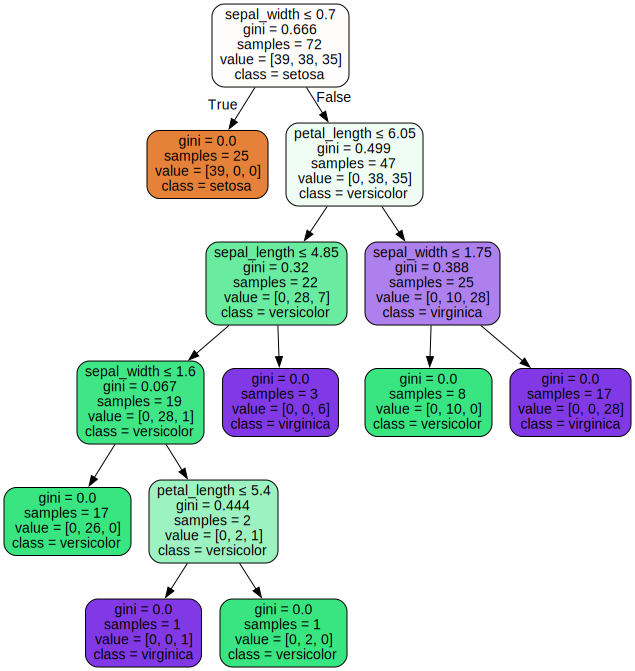

In [25]:
#Q3

dot_data = tree.export_graphviz(forest.estimators_[0], 
                           out_file=None, 
                           feature_names=["petal_length", "petal_width", "sepal_length", "sepal_width"],
                           class_names=["setosa", "versicolor", "virginica"],
                           filled=True, 
                           impurity=True, 
                           rounded=True,
                           special_characters=True)

graphviz.Source(dot_data)